In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import itertools
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [ ]:
df = pd.read_csv("spam.csv", encoding = "latin-1", usecols=["v1", "v2"])

In [ ]:
df.columns = ["label", "message"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


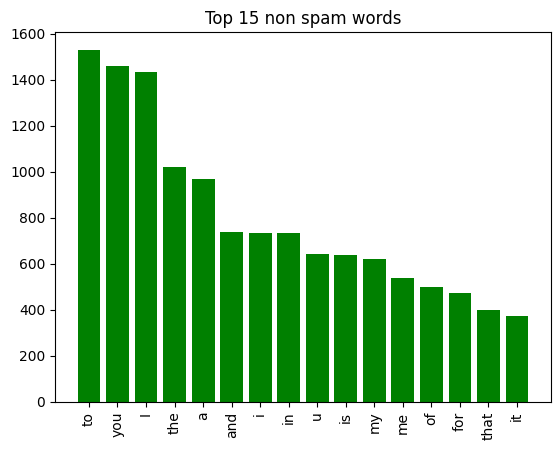

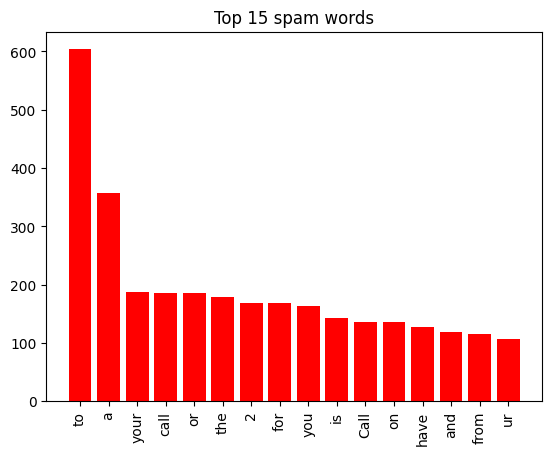

In [ ]:
non_spam_messages = df[df["label"]=="ham"]["message"] #filters non-spam (ham) messages
l = [message.split() for message in non_spam_messages] #creates lists of words from each message
no_spam_words = list(itertools.chain.from_iterable(l)) #concatenates all lists of words into one
spam_messages = df[df["label"]=="spam"]["message"]
k = [message.split() for message in spam_messages]
spam_words = list(itertools.chain.from_iterable(k))

non_spam = Counter(no_spam_words) #creates dictionary with occurrences of each no_spam word
spam = Counter(spam_words) #creates dictionary occurences of each spam word (creates dictionary)

non_spam = sorted(non_spam.items(), key=lambda kv: kv[1], reverse=True) #creates list sorted descending by value (number of occurences)
spam = sorted(spam.items(), key=lambda kv: kv[1], reverse=True)

top15_spam = spam[:16]
top15_nonspam = non_spam[:16]

#slice word and occurences so I can easily plot them
top_words_nonspam = [i[0] for i in top15_nonspam]  #(to,1530) [0]=to [1]=1530
top_occurences_nonspam = [i[1] for i in top15_nonspam]

top_words_spam = [i[0] for i in top15_spam]
top_occurences_spam = [i[1] for i in top15_spam]

plt.bar(top_words_nonspam, top_occurences_nonspam, color = 'green')
plt.title("Top 15 non spam words")
plt.xticks(rotation='vertical')
plt.show()

plt.bar(top_words_spam, top_occurences_spam, color = "red")
plt.title("Top 15 spam words")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X = df["message"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

cv = CountVectorizer(min_df = 0.01, max_df = 0.95, stop_words = 'english') #1% / 300 occurences
cv.fit(X_train)

X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

MultinomialNB()

NameError: ignored